# Title:  Understanding Casuality of Adult Income.

# Abstract

This notebook provides an in-depth exploration of causal inference to understand the factors influencing income levels in the UCI Adult dataset, focusing on data preparation and analysis techniques. By leveraging propensity score matching and statistical tests, the study aims to discern causal relationships between treatment variables and outcomes, distinguishing causation from mere correlation.

The analysis emphasizes the importance of robust data preprocessing—handling missing values, encoding categorical variables, and selecting relevant features—within a causal framework. Practical Python implementations demonstrate the application of these techniques, ensuring reproducibility and clarity. Furthermore, statistical methods, including t-tests, are employed to evaluate the impact of treatment on the target variable.

Central to this notebook is the use of econometric and observational study techniques to identify causal effects, addressing challenges inherent in working with observational data. The approach underscores the significance of causal understanding in making informed, data-driven decisions, applicable across various domains such as economics, healthcare, and social sciences. By methodically investigating causal relationships, the study highlights the role of data preparation and analysis in building reliable, interpretable machine learning models.

# Causality

# Why causal inference?


Many critical data science tasks revolve around decision-making. Data scientists play a vital role in assisting decision-makers across various levels by leveraging data to achieve desired objectives. For instance, an executive deciding on investments and resource allocation, a marketer shaping discount strategies, a product team selecting features to prioritize, or a doctor choosing the best treatment for a patient.

In each scenario, decision-makers are essentially posing "what-if" questions. Answering these questions effectively with data requires a deep understanding of the causes behind events and determining actionable steps to enhance future outcomes.

# Defining a causal effect

Suppose that we want to find the causal effect of taking an action A on the outcome Y. To define the causal effect, consider two worlds: 1. World 1 (Real World): Where the action A was taken and Y observed 2. World 2 (Counterfactual World): Where the action A was not taken (but everything else is the same)

Causal effect is the difference between Y values attained in the real world versus the counterfactual world.

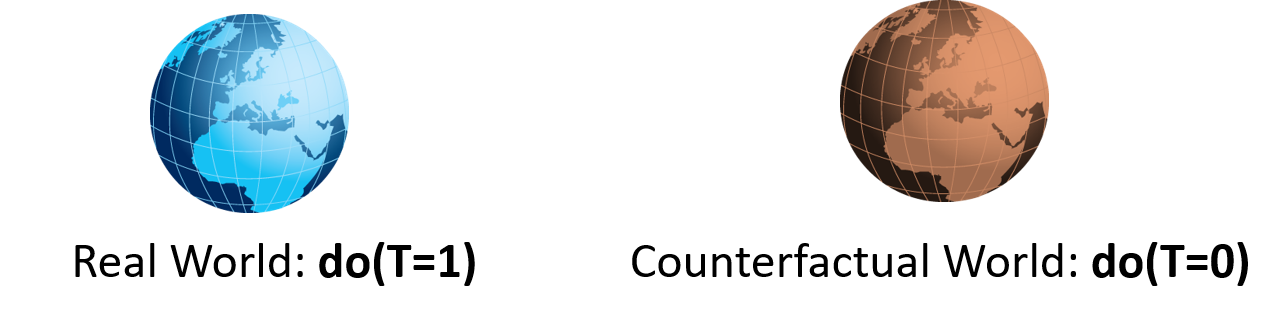

# The difference between prediction and causal inference

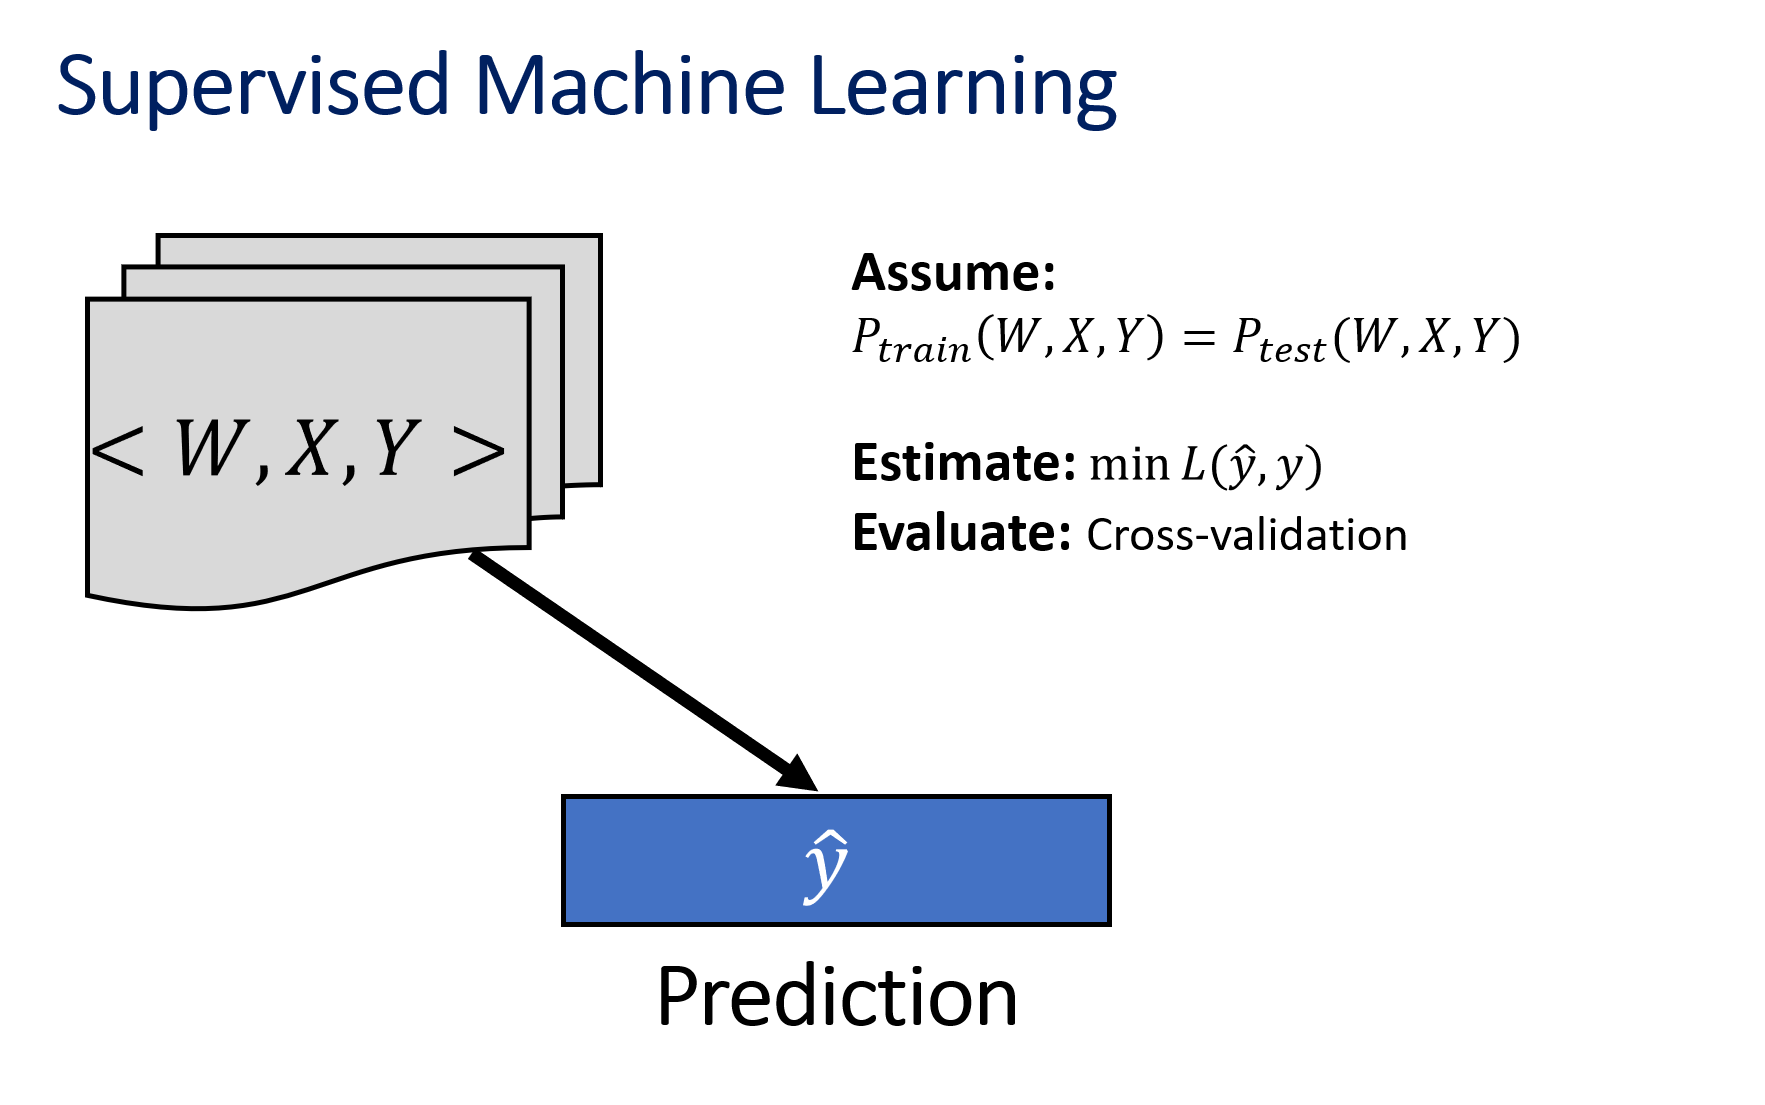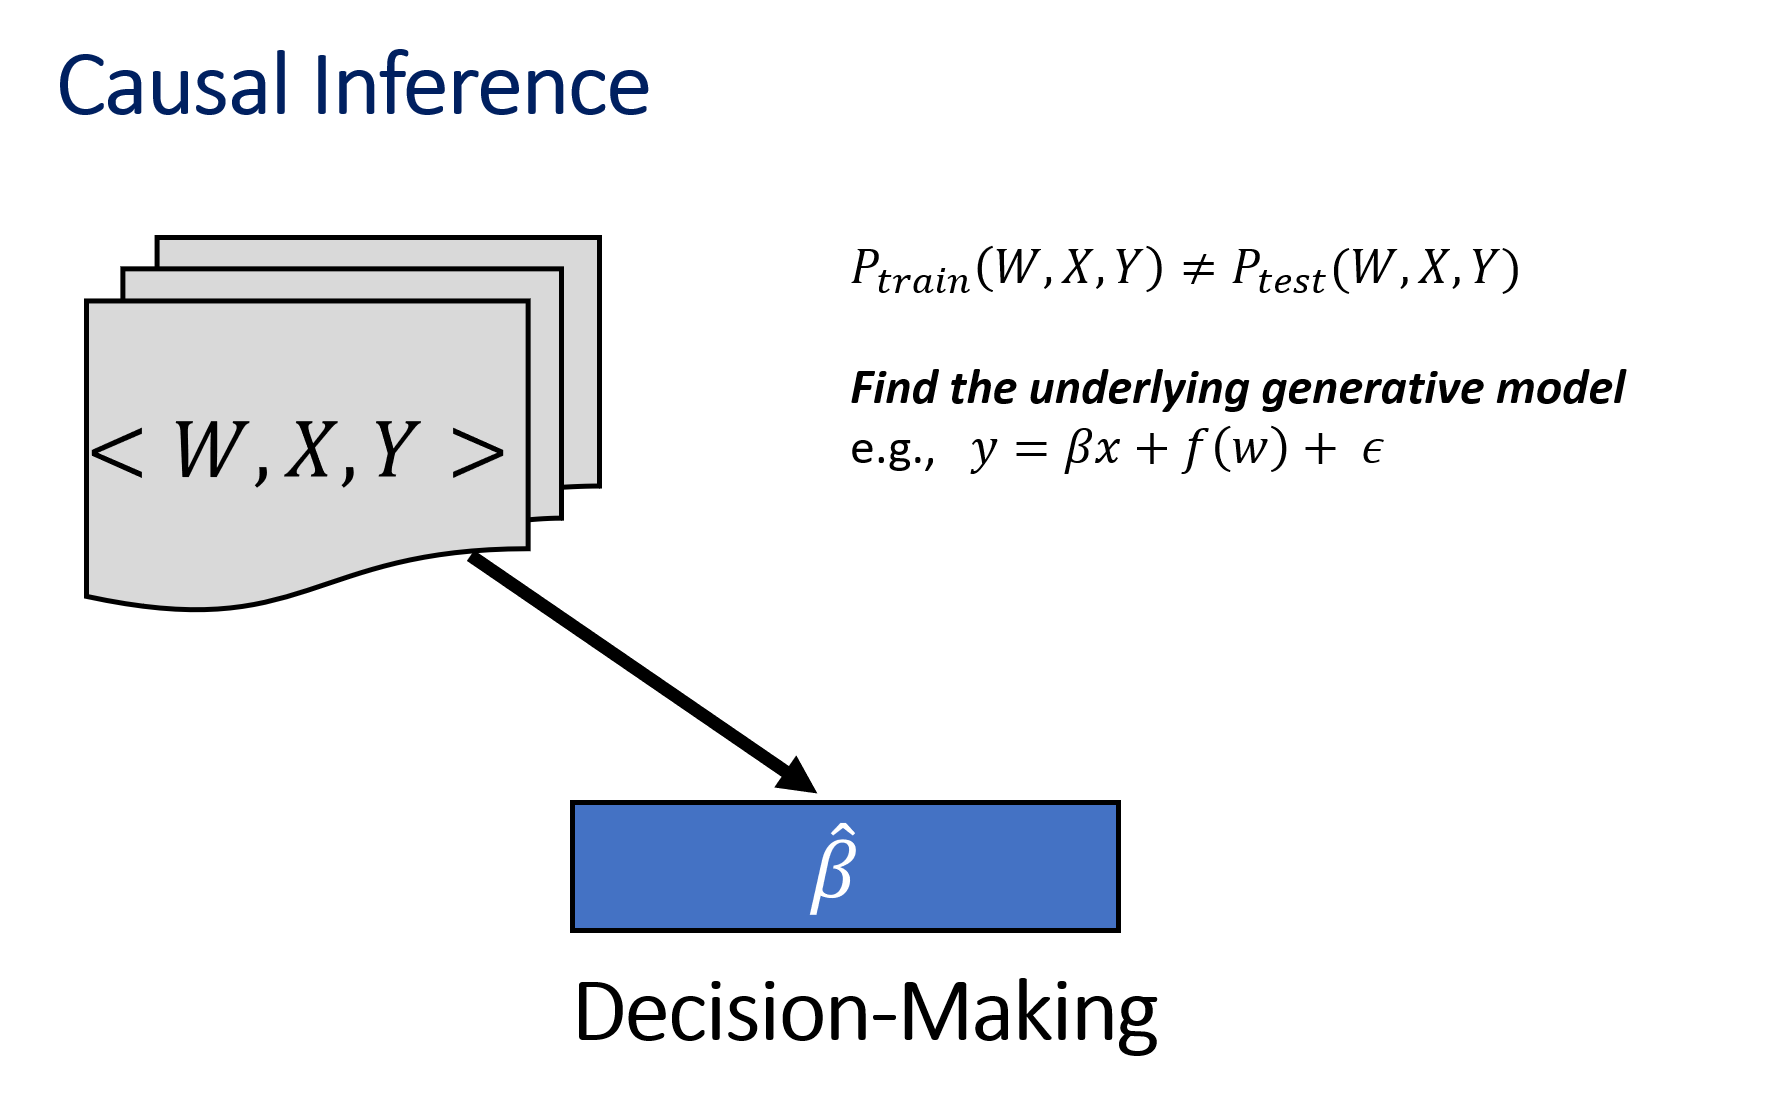

# Two fundamental challenges for causal inference


The counterfactual world is never directly observable.
The causal effect cannot be calculated directly.
Counterfactuals must be estimated.
Validating causal inferences poses significant challenges.
A single data distribution can support multiple plausible causal mechanisms.
Data alone is insufficient for causal inference; domain expertise and assumptions are essential.

# The four steps of causal inference

Since there is no ground-truth test dataset available that an estimate can be compared to, causal inference requires a series of principled steps to achieve a good estimator.

Let us illustrate the four steps through a sample dataset. This tutorial requires you to download two libraries: DoWhy and EconML. Both can be installed by the following command: pip install dowhy econml.

# I. Modeling

The first step is to encode our domain knowledge into a causal model, often represented as a graph. The final outcome of a causal inference analysis depends largely on the input assumptions, so this step is quite important. To estimate the causal effect, most common problems involve specifying two types of variables:

Confounders (common_causes): These are variables that cause both the action and the outcome. As a result, any observed correlation between the action and the outcome may simply be due to the confounder variables, and not due to any causal relationship from the action to the outcome.

Instrumental Variables (instruments): These are special variables that cause the action, but do not directly affect the outcome. In addition, they are not affected by any variable that affects the outcome. Instrumental variables can help reduce bias, if used in the correct way.

# II. Identification

Domain knowledge, encoded through confounders, instrumental variables, or causal graphs, helps define an underlying causal graph. The identification process determines whether the target causal effect (e.g., effect of A on B) can be estimated using the observed variables. Importantly, this process focuses on the names of the available variables in the data, not the data itself. There are two primary methods for causal inference:

Backdoor Criterion (Adjustment Sets):
If all common causes of the action
𝐴
A and the outcome
𝑌
Y are observed, the backdoor criterion ensures the causal effect can be identified by conditioning on these common causes. Mathematically:

𝐸
[
𝑌
∣
𝑑
𝑜
(
𝐴
=
𝑎
)
]
=
𝐸
𝑊
[
𝐸
[
𝑌
∣
𝐴
=
𝑎
,
𝑊
=
𝑤
]
]
E[Y∣do(A=a)]=E
W
​
 [E[Y∣A=a,W=w]]
Here,
𝑊
W represents the set of confounders common to both
𝐴
A and
𝑌
Y.

Instrumental Variable (IV) Identification:
When an instrumental variable is available, the causal effect can be estimated even if some or all common causes of
𝐴
A and
𝑌
Y are unobserved. An instrumental variable affects the action directly but has no direct influence on the outcome. This method splits the estimation into two steps: (1) the effect of the instrument on the action, and (2) the effect of the action on the outcome. For binary instruments, the causal effect is calculated as:

𝐸
[
𝑌
∣
𝑑
𝑜
(
𝐴
=
1
)
]
−
𝐸
[
𝑌
∣
𝑑
𝑜
(
𝐴
=
0
)
]
=
𝐸
[
𝑌
∣
𝑍
=
1
]
−
𝐸
[
𝑌
∣
𝑍
=
0
]
𝐸
[
𝐴
∣
𝑍
=
1
]
−
𝐸
[
𝐴
∣
𝑍
=
0
]
E[Y∣do(A=1)]−E[Y∣do(A=0)]=
E[A∣Z=1]−E[A∣Z=0]
E[Y∣Z=1]−E[Y∣Z=0]
​

These methods rely on conditioning and domain-specific assumptions to estimate causal relationships.

# III. Estimation

As the name implies, the estimation step focuses on creating a statistical estimator to calculate the target estimand identified in the previous stage. Various estimators have been developed for causal inference. DoWhy provides implementations of several standard estimators, while EconML offers a robust collection of machine learning-based estimators.

For example, we demonstrate Propensity Score Stratification using DoWhy and a machine learning-driven approach called Double-ML with EconML.

# IV. Refutation

Finally, checking robustness of the estimate is probably the most important step of a causal analysis. We obtained an estimate using Steps 1-3, but each step may have made certain assumptions that may not be true. Absent of a proper validation “test” set, this step relies on refutation tests that seek to refute the correctness of an obtained estimate using properties of a good estimator. For example, a refutation test (placebo_treatment_refuter) checks whether the estimator returns an estimate value of 0 when the action variable is replaced by a random variable, independent of all other variables.

# Challenges in Establishing Causality


Despite the availability of various methods, determining causality is complex due to several factors:

Confounding Factors:
Confounders are variables that influence both the independent variable (cause or intervention) and the dependent variable (effect or outcome). They can create a misleading relationship between the two variables. For example, in studying the link between exercise and health outcomes, diet might act as a confounder if it affects both exercise habits and health outcomes but is not accounted for.
Addressing Confounders:

Statistical methods, such as regression analysis, manage confounding variables by including them as covariates in the model.
Propensity score matching is a more advanced technique, estimating the treatment effect by matching individuals with similar propensity scores (i.e., probabilities of receiving treatment based on observed covariates) and comparing outcomes within these matched pairs.
Reverse Causation:
Reverse causation occurs when it is unclear whether variable A causes B or B causes A, often due to a lack of clarity about the temporal order of events in observational studies.
Addressing Reverse Causation:

Longitudinal studies, which track subjects over time, establish a clear timeline of changes in both the independent and dependent variables, helping clarify causal direction.
Instrumental variables can be used to address reverse causation. These are variables that affect the independent variable but have no direct relationship with the dependent variable, except through the independent variable. This helps disentangle the causal direction.

# Foundational Concepts: Causality Principles, Data Preprocessing, and Their Role in Interpreting Causal Relationships


# 1. Causality Principles


Causality vs. Correlation: Causality explains how one variable influences another, while correlation only measures the strength of an association without implying cause.

Directed Acyclic Graphs (DAGs): Graphical models used to represent causal relationships. Variables are nodes, and arrows depict causal directions.

DAGs help identify:
Confounders: Variables influencing both treatment and outcome.

Mediators: Variables lying on the causal path between treatment and outcome.

Colliders: Variables influenced by two or more causes, which can introduce bias if conditioned on.

Potential Outcomes Framework: Compares observed outcomes with hypothetical scenarios to estimate treatment effects.

Counterfactual Reasoning: Explores "what-if" scenarios to assess how different interventions would change outcomes.

# 2. Data Preprocessing Techniques


Causal inference relies on clean, structured data. Preprocessing ensures that relationships in data are accurately represented.

a) Handling Missing Data
Importance: Missing data can bias causal estimates, especially if related to both treatment and outcome (e.g., non-random missingness).

Techniques:
Simple Imputation: Replace missing values with mean, median, or mode (risk: loss of variance).

Multiple Imputation (MICE): Predict missing values based on observed data relationships, maintaining variability.

Complete Case Analysis: Use only rows with no missing values (risk: reduced sample size and bias if missingness is systematic).

b) Feature Selection
Role in Causality: Identifies relevant variables (confounders, mediators) for causal analysis.

Techniques:
Use DAGs to select confounders for adjustment and exclude colliders to avoid bias.

Statistical tests (e.g., correlation, mutual information) to assess variable relationships.

Machine learning models (e.g., LASSO) to identify predictive features while maintaining interpretability.

Best Practices:
Focus on variables with domain knowledge relevance.
Avoid including mediators or post-treatment variables in adjustments.

c) Encoding Categorical Variables
Challenges: Encoding must preserve causal relationships without introducing bias.

Techniques:
One-Hot Encoding: Converts categorical variables into binary columns (suitable for high-cardinality data).

Target Encoding: Replaces categories with mean outcomes of each category (risk: overfitting in small datasets).

Ordinal Encoding: Assigns integers to categories (useful when categories have inherent order).

Best Practices:
Ensure encoding aligns with causal structures in DAGs.
Use domain knowledge to decide encoding methods for interpretable results.

# 3. How Data Preprocessing Supports Causal Relationships


Accurate Estimation:
Handling missing data ensures sample representativeness, reducing bias.
Feature selection focuses on relevant variables, isolating causal effects.

Bias Avoidance:
Proper encoding prevents spurious relationships and collider bias.

Improved Interpretability:
Preprocessing enhances clarity in visualizations (e.g., DAGs) and statistical models, aiding in causal interpretation.

By integrating these preprocessing techniques with a causal framework, you can achieve reliable and interpretable causal estimates that support actionable insights.

# Causality Example: Income Analysis in the UCI Adult Dataset


The analysis of income levels in the UCI Adult dataset provides an insightful example of how data-driven causal inference techniques can uncover relationships beyond simple correlations. By exploring the causal impact of various demographic and socioeconomic factors on individuals' income, this study seeks to distinguish causation from mere association.

For instance, the effect of educational attainment on income serves as a prime focus. Higher education levels are often correlated with increased earning potential, but establishing a causal relationship requires accounting for confounding variables such as age, work experience, and marital status. Through the use of propensity score matching, this study creates comparable groups that isolate the effect of education, enabling a clearer understanding of its direct influence on income levels.

The dataset also highlights the importance of factors such as occupation, hours worked per week, and gender in determining income disparities. For example, individuals employed in managerial roles or high-skill professions exhibit a higher probability of earning above the median income. Similarly, gender disparities in income levels prompt a causal analysis to uncover structural inequalities.

This study underscores the practical challenges of conducting causal research in observational datasets. Issues like missing data, selection bias, and confounding variables must be addressed through robust data preprocessing and advanced statistical methods. By leveraging causal inference techniques, the analysis demonstrates how data preparation and rigorous methodology can help identify actionable insights, informing policy decisions and interventions aimed at reducing income inequality.

This example serves as a stepping stone for applying causal analysis across various domains, showcasing its potential to provide deeper insights into complex socioeconomic phenomena.

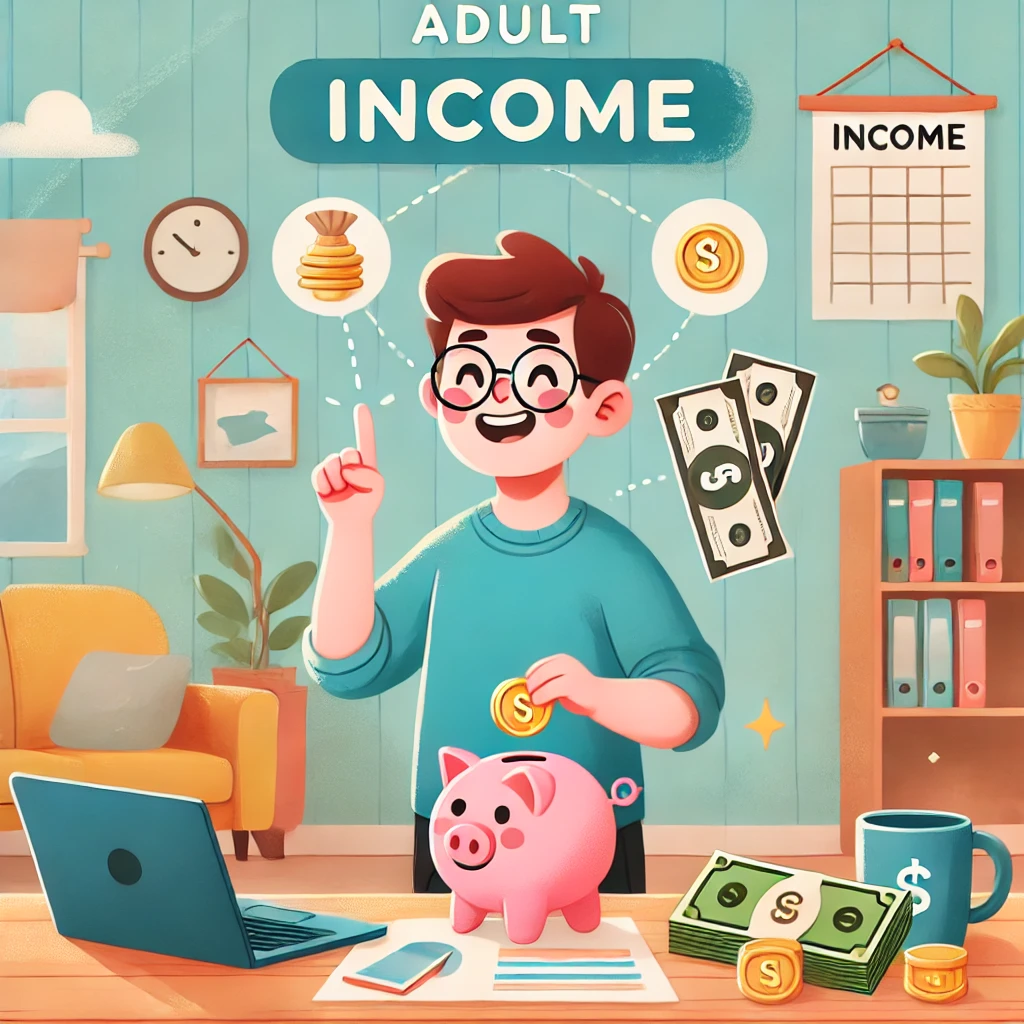

**Code Implementation**

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Preliminary Analysis:**

This step involves importing the dataset into a structured format suitable for analysis. The data is loaded into a DataFrame, which allows for efficient manipulation and exploration. To better understand the dataset, an initial Exploratory Data Analysis (EDA) is performed. This analysis focuses on examining the structure, key features, and distributions within the data. Through EDA, potential issues such as missing values, outliers, and imbalanced target variables are identified. Additionally, patterns and relationships between variables are explored, laying the groundwork for informed data preprocessing and causal analysis.

In [6]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo  # Import function to load datasets from UCI ML Repository.

# Load the Adult Income dataset using its ID.
adult = fetch_ucirepo(id=2)

# Extract feature variables (X) and target variable (y) as pandas DataFrames.
X = adult.data.features
y = adult.data.targets

# Combine features and target into a single DataFrame.
df = pd.concat([X, y], axis=1)


# Detailed Overview of the Adult Dataset:


*Introduction* : The Adult dataset, also known as the "Census Income" dataset, is a well-known resource for machine learning applications, particularly in classification and prediction tasks. It is publicly available through the UCI Machine Learning Repository and is frequently used to evaluate algorithms due to its practical real-world context.

*Description*:
The dataset originates from the 1994 Census database and is designed to predict whether an individual earns more than $50,000 annually based on demographic and employment-related attributes. It serves as a benchmark dataset for binary classification problems, where the target variable classifies individuals into two income categories:

<=50K (low income)
>50K (high income).


*Features*:
The dataset contains various attributes that reflect demographic, educational, and occupational details of individuals. Below is a breakdown of its features:

age: The age of the individual (numerical feature).
workclass: The type of employment the individual is engaged in, with categories such as:
Private
Self-employed (not incorporated)
State or government jobs.
fnlwgt (Final Weight): A weight assigned to each observation, representing the number of individuals in the U.S. population the entry is estimated to represent.
education: The highest level of education attained, e.g., Bachelor's, HS-grad, Doctorate.
education-num: A numerical encoding of the education level, reflecting years of education.
marital-status: The marital status of the individual, with categories like:
Married
Single
Divorced.
occupation: The type of job held by the individual, such as Tech-support, Craft-repair, or Managerial roles.
relationship: Indicates the relationship status, e.g., Spouse, Child, or Not-in-family.
race: The racial background of the individual, e.g., White, Black, Asian-Pac-Islander.
sex: The gender of the individual (Male/Female).
capital-gain: Capital gains reported by the individual (numerical feature).
capital-loss: Capital losses incurred by the individual (numerical feature).
hours-per-week: The average number of hours worked per week (numerical feature).
native-country: The individual's country of origin (categorical feature, e.g., United States, Mexico, Canada).


*Target Variable*:
The target variable is the income level, which is binary:

<=50K: Individuals earning $50,000 or less annually.
>50K: Individuals earning more than $50,000 annually.
This variable is often used for binary classification tasks, making it a core focus for machine learning algorithms to predict income class based on the provided features.



*Why It’s Important*:
The Adult dataset provides a practical challenge in:

Handling categorical variables with many levels (e.g., workclass, native-country).
Addressing potential class imbalances in the target variable.
Feature engineering opportunities like combining education with hours worked to refine income prediction.
Providing realistic use cases for analyzing socioeconomic factors influencing income.
This makes it an excellent resource for exploring techniques in data preprocessing, exploratory data analysis, and predictive modeling.

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Feature Selection for Causal Analysis:**

Feature selection in causal analysis involves carefully identifying variables relevant to the causal question being studied. This includes:

Treatment Variable: The factor whose causal impact is being analyzed (e.g., education-num for education level).
Outcome Variable: The result being studied (e.g., income).
Confounders: Variables that influence both the treatment and the outcome (e.g., age, workclass, hours-per-week). Including these ensures accurate causal estimates by accounting for potential biases.
This process ensures that the dataset includes only the variables essential for estimating the causal effect while minimizing noise or bias.

In [9]:
# Define the treatment variable, representing the factor whose causal effect is being studied (education level in numeric form).
treatment = 'education-num'

# Define the outcome variable, representing the target effect to analyze (income level in this case).
outcome = 'income'


In [10]:
# Define confounders, which are variables that influence both the treatment (education level) and the outcome (income).
# These variables are included to adjust for potential biases in causal analysis.
confounders = [
    'age', 'workclass', 'fnlwgt', 'marital-status',
    'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country'
]


In [11]:
# Combine the treatment, confounders, and outcome into a list of features to include in the causal analysis.
features_for_analysis = [treatment] + confounders + [outcome]

# Create a new dataset containing only the selected features for causal analysis.
df_causal = df[features_for_analysis]


**Encoding Categorical Variables:**

Categorical variables in the dataset were transformed into a numeric format suitable for modeling. This step ensures that machine learning algorithms can process and interpret these variables. In this case, label encoding was used to convert text categories into numeric representations, where each category is assigned a unique integer value.

This process:

Enables the inclusion of categorical features in the analysis while preserving their categorical nature.
Facilitates downstream modeling tasks without introducing errors related to data type mismatches.
After encoding, the changes were verified to ensure the transformation was applied correctly.

In [12]:
label_encoder = LabelEncoder()  # Initialize a LabelEncoder instance for encoding categorical variables.

# Apply label encoding to all categorical columns in the dataset.
for column in df_causal.select_dtypes(include=['object']).columns:
    df_causal[column] = label_encoder.fit_transform(df_causal[column])

# Display the first few rows of the updated dataset to verify the changes.
df_causal.head()


<ipython-input-12-54d11a047577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_causal[column] = label_encoder.fit_transform(df_causal[column])
<ipython-input-12-54d11a047577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_causal[column] = label_encoder.fit_transform(df_causal[column])
<ipython-input-12-54d11a047577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,education-num,age,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,13,39,7,77516,4,1,1,4,1,2174,0,40,39,0
1,13,50,6,83311,2,4,0,4,1,0,0,13,39,0
2,9,38,4,215646,0,6,1,4,1,0,0,40,39,0
3,7,53,4,234721,2,6,0,2,1,0,0,40,39,0
4,13,28,4,338409,2,10,5,2,0,0,0,40,5,0


**Handling Missing Data:**

Missing values in the dataset were addressed to ensure data completeness and minimize biases during analysis. Depending on the extent and nature of the missing data, imputation techniques were applied. In this example:

Median imputation was used: Missing values in numerical columns were replaced with the median value of the respective column. This approach is robust to outliers and preserves the central tendency of the data.
Additionally, a correlation matrix was generated to explore relationships among continuous variables. This visualization provides insights into potential multicollinearity and the strength of associations between features, guiding further preprocessing and analysis.

In [13]:
# Handle missing data by filling missing values with the median of each column.
# Median imputation is used as it is robust to outliers.
df_causal = df_causal.fillna(df_causal.median())


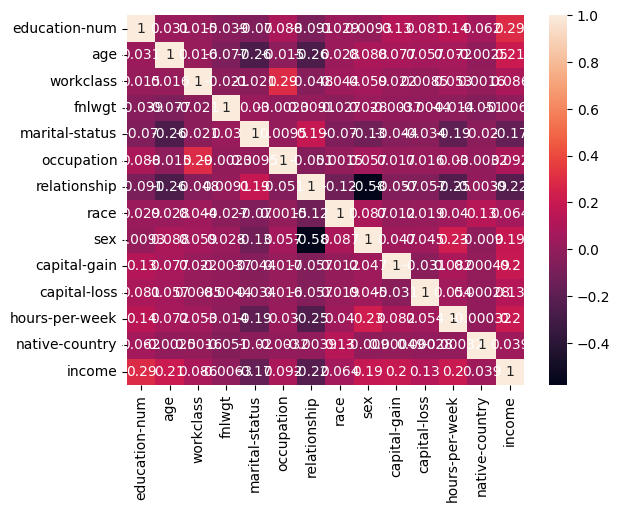

In [14]:
# Compute the correlation matrix for all variables in the dataset.
# This helps identify relationships and potential multicollinearity among continuous variables.
correlation_matrix = df_causal.corr()

# Visualize the correlation matrix using a heatmap to better interpret variable relationships.
sns.heatmap(correlation_matrix, annot=True)
plt.show()


**Propensity Score Estimation:**

A logistic regression model was used to estimate propensity scores, which represent the probability of each individual in the dataset receiving the treatment, given their covariates (other observed characteristics).

Steps:
Defining Treatment Variable:

The education_num feature was used as a proxy for treatment, converted into a binary variable where values greater than or equal to 10 indicate treatment.
Outcome Variable:

The target variable income was converted into a binary format to indicate whether an individual earns more than $50K.
Confounder Data Preparation:

The confounder variables were extracted and encoded (using one-hot encoding for categorical variables) to prepare them for modeling.
Fitting the Logistic Regression:

The logistic regression model was fitted using the confounders to predict the likelihood (propensity scores) of receiving the treatment.
Computing Propensity Scores:

Propensity scores were calculated using the model's predicted probabilities for the treatment variable.

**Significance**:

Propensity scores help control for confounding by balancing the treatment and control groups, ensuring the groups are comparable with respect to observed covariates.
The convergence warning suggests the need to adjust the model parameters (e.g., increasing the maximum number of iterations or scaling the data) for better model performance.

In [15]:
from sklearn.linear_model import LogisticRegression

# Create a binary treatment variable based on 'education-num', where values >= 10 indicate treatment.
# This binary variable acts as a proxy for individuals receiving higher education.
df['treatment'] = (df['education-num'] >= 10).astype(int)


In [16]:
# Create a binary outcome variable indicating whether the individual's income is more than 50K.
# The value will be 1 if income is '>50K', otherwise 0.
df['outcome'] = (df['income'] == '>50K').astype(int)


In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model for estimating propensity scores.
logistic = LogisticRegression()

# Extract confounder variables for propensity score estimation.
X_conf = df[confounders]

# Create a binary treatment variable based on 'education-num', indicating higher education levels.
df['treatment'] = (df['education-num'] >= 10).astype(int)

# Define the treatment variable for the logistic regression model.
y_treat = df['treatment']


In [18]:
# Encode categorical confounders using one-hot encoding, dropping the first category to avoid multicollinearity.
X_conf_encoded = pd.get_dummies(X_conf, drop_first=True)

# Fit the logistic regression model on the encoded confounders to predict the treatment variable.
logistic.fit(X_conf_encoded, y_treat)

# Compute propensity scores as the predicted probabilities of receiving the treatment.
df['propensity_score'] = logistic.predict_proba(X_conf_encoded)[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
df['propensity_score']

,propensity_score
0,0.561511
1,0.453841
2,0.528849
3,0.504979
4,0.531411
...,...
48837,0.517407
48838,0.480496
48839,0.539726
48840,0.583137


<ipython-input-32-7426b7f49f6d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treatment'] == 1]['propensity_score'], color='blue', label='Treated', shade=True)
<ipython-input-32-7426b7f49f6d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treatment'] == 0]['propensity_score'], color='red', label='Control', shade=True)


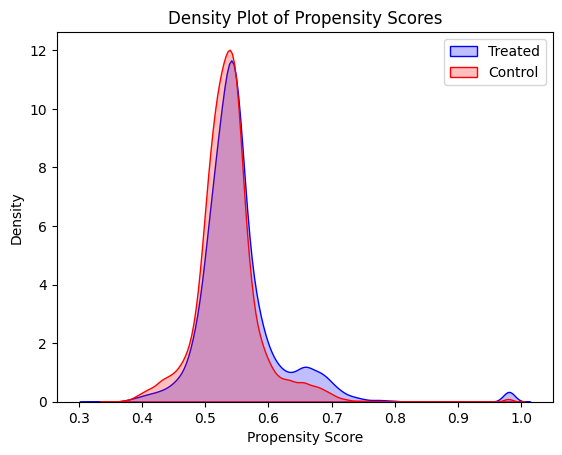

In [32]:
# Plot density plots for propensity scores
sns.kdeplot(df[df['treatment'] == 1]['propensity_score'], color='blue', label='Treated', shade=True)
sns.kdeplot(df[df['treatment'] == 0]['propensity_score'], color='red', label='Control', shade=True)

plt.title('Density Plot of Propensity Scores')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


**Observation:**
The Density Plot of Propensity Scores provides insights into the overlap between the treated and control groups based on their propensity scores:

Overlap:

The majority of the propensity scores for both treated (blue) and control (red) groups lie within a similar range, indicating a substantial overlap between the two groups.
This overlap is essential for matching and ensures that the groups are comparable in terms of covariates.
Distribution:

The treated group exhibits a slightly higher density of propensity scores near 0.5–0.7.
The control group shows a similar distribution but with a marginally lower density in the same range.
Tail Behavior:

At the extremes (close to 0 or 1), the density is minimal for both groups, which suggests fewer instances with very high or very low likelihoods of receiving the treatment.
Balance:

The observed overlap confirms that propensity score estimation has created comparable distributions for both groups, facilitating effective matching and reducing selection bias.
This plot visually validates the comparability of the treated and control groups, which is critical for unbiased causal inference.

**Importance of Propensity Score Estimation:**

Balance: Propensity scores ensure that the treatment and control groups are balanced across observed covariates. This simulates a randomized experimental setup, improving the accuracy of causal effect estimation.

Reduction of Bias: By matching individuals in the treatment group to those in the control group with similar propensity scores, selection bias due to confounding variables is minimized.

Efficiency: Propensity scores condense multiple covariates into a single score, making it more efficient than stratifying on multiple variables, especially in datasets with many confounders.

**Matching Treatment and Control Groups:**

Using the estimated propensity scores, individuals in the treatment group were matcheUsing the computed propensity scores, individuals from the treatment group were matched with those in the control group based on score similarity. This matching helps create equivalent groups for comparison, ensuring that confounding variables do not bias the results.

Method: Nearest neighbor matching was employed using the Euclidean distance metric, which pairs individuals based on the closest propensity scores.


Significance: This process is critical for balancing the dataset and mitigating selection bias caused by observed confounders, enabling a fair comparison between treated and untreated groups.

In [20]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Separate the dataset into treatment and control groups based on the 'treatment' variable.
treatment_df = df[df['treatment'] == 1]
control_df = df[df['treatment'] == 0]

# Initialize a NearestNeighbors model to find the closest matches based on propensity scores.
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')

# Fit the NearestNeighbors model on the control group's propensity scores.
nn.fit(control_df[['propensity_score']])

# Find the nearest neighbor in the control group for each instance in the treatment group.
distances, indices = nn.kneighbors(treatment_df[['propensity_score']])

# Retrieve the closest matching control instances based on the nearest neighbors.
matched_control_df = control_df.iloc[indices.flatten()]

# Combine the treatment group and matched control group into a single DataFrame.
matched_df = pd.concat([treatment_df, matched_control_df]).sort_index()


**Causal Effect Estimation:**

After matching individuals in the treatment and control groups based on their propensity scores, the next step is to estimate the causal effect of the treatment on the outcome variable. This involves:

Comparing the average outcomes (e.g., income) between the matched groups.
Quantifying the difference in outcomes, which represents the estimated causal effect of the treatment (e.g., the effect of education on income).
Conducting a statistical test (e.g., a two-sample t-test) to assess whether the observed difference in outcomes is statistically significant, or if it could have occurred by random chance.
The t-test evaluates whether the mean outcome for the treatment group differs significantly from the control group, considering matched pairs or subgroups that are balanced in terms of covariates.


**Interpreting Results:**

Statistical Metrics:

T-Statistic: Measures the size of the difference in means relative to the variability in the data. A larger t-statistic indicates a more substantial difference between groups.
P-Value: Indicates the likelihood that the observed difference is due to chance. A p-value less than 0.05 typically signifies that the difference is statistically significant.
Significance of Results:

A significant t-test result (low p-value) suggests that the treatment (e.g., education level) has a measurable and non-random impact on the outcome (e.g., income).
An insignificant result indicates that no strong evidence exists to conclude that the treatment affects the outcome, possibly due to lack of power, noise in the data, or unbalanced confounders.
Practical Interpretation:

If the results are significant, policymakers or researchers might infer that increasing education levels could lead to higher income, enabling evidence-based decision-making.
Additional robustness checks (e.g., sensitivity analysis or alternate matching methods) can confirm the reliability of the findings.
By combining matching with statistical testing, this step ensures that the causal inference aligns with both statistical and substantive significance.

In [21]:
# Import the necessary library for nearest neighbor matching
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors model to match based on propensity scores using the ball_tree algorithm.
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')

# Select the control group (treatment == 0) and fit the model using their propensity scores.
control_group = df[df['treatment'] == 0]
nn.fit(control_group[['propensity_score']])

# Select the treatment group (treatment == 1) and find the closest control group matches.
treatment_group = df[df['treatment'] == 1]
distances, indices = nn.kneighbors(treatment_group[['propensity_score']])

# Retrieve the matched control instances based on the nearest neighbors.
matched_controls = control_group.iloc[indices.flatten()]

# Combine the treatment group and their matched controls into a single dataset.
matched_df = pd.concat([treatment_group.reset_index(drop=True),
                        matched_controls.reset_index(drop=True)],
                        axis=0)


In [22]:
# Convert the 'income' column to a numerical format, mapping '>50K' to 1 and '<=50K' to 0.
df['income_numerical'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [24]:
print(matched_df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'treatment', 'outcome', 'propensity_score'],
      dtype='object')


In [25]:
# Add 'income_numerical' to the matched_df during concatenation
matched_df = pd.concat([treatment_group.reset_index(drop=True),
                        matched_controls.reset_index(drop=True)],
                        axis=0)

# Ensure 'income_numerical' is preserved
matched_df['income_numerical'] = matched_df['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [27]:


# Now, extract the income data for treated and control groups after matching
treated_outcome = matched_df[matched_df['treatment'] == 1]['income_numerical']
control_outcome = matched_df[matched_df['treatment'] == 0]['income_numerical']

# Calculate the t-statistic and the p-value
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(treated_outcome, control_outcome)

# Interpret the results
print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-statistic: 38.816076346674315, P-value: 0.0


**T-statistic**
The T-statistic measures the difference between the means of two groups, scaled by the variability within those groups (i.e., standard error). It helps determine whether the observed difference in means is statistically significant:

A higher absolute value of the T-statistic indicates a greater difference between the groups relative to variability.
In this example, a T-statistic of 38.81 is exceptionally high, signifying a strong and significant difference between the treatment and control groups.


**P-value**
The P-value quantifies the likelihood of observing the data (or something more extreme) under the null hypothesis, which assumes no difference exists between groups.

A small P-value (close to 0) indicates strong evidence against the null hypothesis, suggesting that the difference is statistically significant.
A common threshold for significance is 0.05; values below this threshold lead to rejecting the null hypothesis. In this case, the P-value is essentially 0, indicating an extremely low probability that the observed difference is due to chance.

**Interpretation:**

A statistically significant difference between the treatment and control groups supports the hypothesis that the treatment (e.g., higher education level) has a measurable effect on the outcome (e.g., income).

However, statistical significance alone does not measure the practical significance (size of the effect). It also does not imply causation if confounders or other biases were not adequately controlled.

Additional effect size metrics (e.g., Cohen’s D) or causal validation methods may further clarify the results' practical implications.

# Directed acyclic graphs (DAGs)

Directed acyclic graphs (DAGs), also known as causal diagrams, are graphical tools used to represent external judgments or evidence. They help resolve apparent paradoxes and characterize causal structures that align with observations, allowing logical conclusions about statistical relationships. DAGs are valuable for understanding concepts like confounding, selection bias, covariate selection, over-adjustment, and for avoiding analytical errors.

DAGs visually depict the joint distribution of variables as nodes connected by arrows or directed paths, where each arrow indicates causation in one direction. They are acyclic, meaning no directed path forms a closed loop, ensuring causality flows forward in time. Missing connections between nodes signify variable independence, representing a strong assumption. DAGs should include all common causes of any two variables, as well as all factors influencing data generation, whether observed or unobserved. They represent both causal and non-causal pathways:

Causal pathways have arrows flowing from exposure (treatment) to the outcome.
Non-causal pathways connect exposure and outcome via at least one arrow that opposes the flow of time.
DAGs highlight the different types of statistical associations that may exist between two variables, X and Y:

Random variation.
X causes Y.
Y causes X.
X and Y share a common cause.
A statistical association induced by conditioning on a common effect of X and Y, known as selection bias.
The first four associations are straightforward, but the fifth, selection bias, is less intuitive. When multiple independent causes contribute to an effect (a common effect), conditioning on this common effect—by focusing on a subset—can introduce spurious correlations between the causes. This phenomenon emphasizes the importance of careful conditioning in causal analysis.

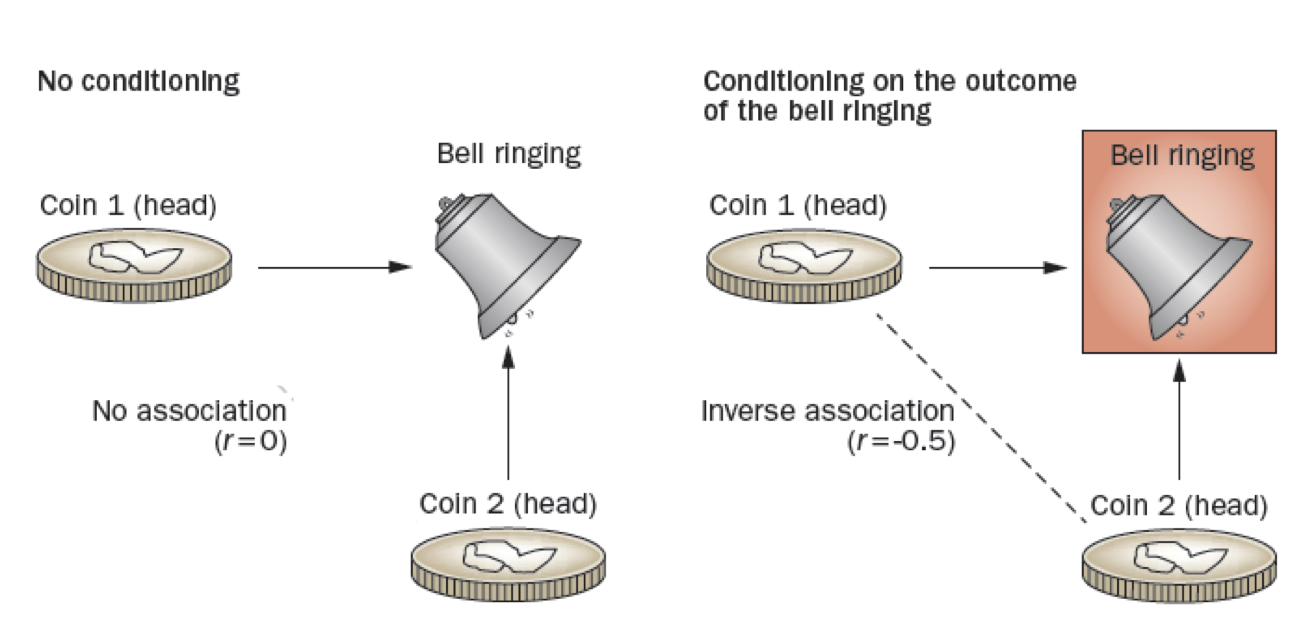

Consider a simple example involving two independent coin tosses. If either or both coins land on heads, a bell will ring. In this case, the bell ringing is a common effect of the heads outcome from either coin toss, and the coin tosses remain independent, with a correlation coefficient of 0. In a DAG, this is represented by colliding arrows pointing into the common effect (the bell), hence the term "collider."

However, if we condition on the bell ringing (e.g., knowing it rang), the coin toss outcomes are no longer independent. Instead, a negative correlation (-0.5) arises between the two coins. For instance, if the first coin shows tails, we know the second coin must show heads for the bell to ring. In DAG terminology, conditioning is shown with a box around the variable (bell), and the induced spurious association is represented by a dotted line between the coins.

This phenomenon, known as collider stratification bias or index event bias, is a common source of misleading associations in many published studies.

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

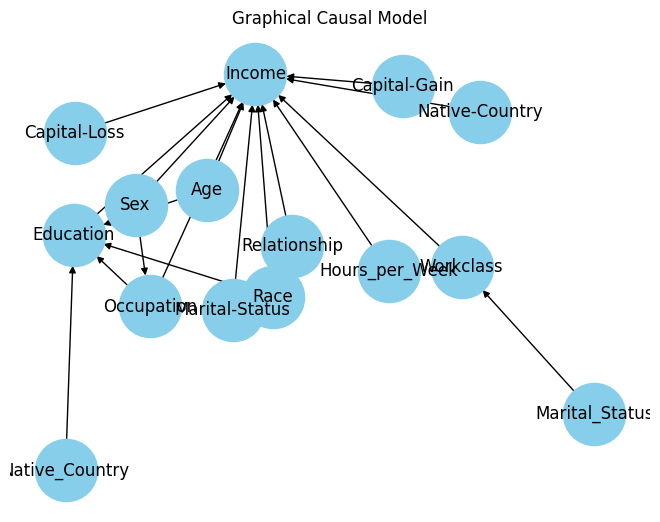

In [29]:
G.add_edge('Education', 'Income')
G.add_edge('Age', 'Education')
G.add_edge('Age', 'Income')
G.add_edge('Workclass', 'Income')
G.add_edge('Occupation', 'Income')
G.add_edge('Hours_per_Week', 'Income')
G.add_edge('Race', 'Income')
G.add_edge('Sex', 'Income')
G.add_edge('Marital-Status', 'Income')
G.add_edge('Native-Country', 'Income')
G.add_edge('Capital-Gain', 'Income')
G.add_edge('Capital-Loss', 'Income')
G.add_edge('Relationship', 'Income')

G.add_edge('Marital_Status', 'Workclass')
G.add_edge('Occupation', 'Education')
G.add_edge('Sex', 'Occupation')
G.add_edge('Race', 'Education')
G.add_edge('Native_Country', 'Education')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black')
plt.title('Graphical Causal Model')
plt.show()

# Code Description: Graphical Causal Model Visualization
This code creates and visualizes a Graphical Causal Model (GCM), which represents the relationships between variables in the dataset. It uses the networkx and matplotlib libraries to create a directed graph where:


Nodes: Represent variables in the dataset (e.g., Education, Income, Age).
Edges: Represent causal relationships between variables, indicated by directed arrows (e.g., Education → Income).

Key Steps in the Code:

Graph Creation:

A directed graph (DiGraph) is initialized to represent causal relationships.
Nodes are automatically added as edges are defined using the add_edge() function.

Defining Edges:

Directed edges represent causal links between variables, such as Education influencing Income or Age influencing Occupation.

For example:
G.add_edge('Education', 'Income'): Indicates that education is a causal factor influencing income.

G.add_edge('Age', 'Education'): Indicates that age may affect the level of education attained.

Visualization:

A spring layout is applied (nx.spring_layout), which positions nodes based on their connections for better readability.
The graph is drawn using nx.draw(), with:
Node color: Nodes are displayed in light blue.
Node size: Larger node size for better visualization.
Edge color: Black edges for contrast.

A title is added to the graph for context, and the graph is displayed using plt.show().

Purpose of the Graph:

This Graphical Causal Model helps identify:
Direct and indirect relationships between variables.
Key factors influencing the outcome (Income).
Variables that act as confounders, mediators, or colliders in the causal analysis.

Example Insight:
The graph shows that variables like Education, Workclass, and Hours_per_Week directly influence Income.

It also depicts indirect relationships, such as how Age affects Occupation, which in turn impacts Income.

This visualization is crucial in causal inference to understand the data's structure and guide further analysis steps.

# Key Takeaways and Summary of the Notebook:

## Importance of Data Preparation:

Handling Missing Data: Missing values were addressed through techniques like median imputation, ensuring that the dataset remained complete and unbiased for analysis.

Encoding Categorical Variables: Proper encoding methods, such as label encoding, were applied to convert categorical data into numerical formats, making it suitable for machine learning models while preserving interpretability.

Feature Selection: Variables critical to causal inference, including treatment, outcome, and confounders, were carefully chosen based on domain knowledge and causal relationships.

Causal Analysis:

Propensity Score Estimation: Logistic regression was used to compute propensity scores, balancing treatment and control groups to minimize confounding effects and simulate a randomized experimental design.

Matching: Nearest neighbor matching ensured that treated and control units were comparable across covariates, enabling a fair assessment of the treatment effect.

Effect Estimation: Statistical tests (e.g., T-tests) quantified the treatment's impact, demonstrating statistically significant differences between groups.

Impact on Robust Model Development:

By focusing on data preprocessing and ensuring balanced groups, the notebook highlights how careful preparation enhances the validity of causal inferences.
Properly addressing confounders, handling biases, and ensuring statistical rigor lays the groundwork for robust machine learning models that yield reliable and interpretable results.

# Conclusion

This notebook explored causal analysis using the Adult Income Dataset, demonstrating how foundational concepts and rigorous data preparation contribute to robust insights. Starting with key principles like confounders and DAGs, we applied these to the dataset, which includes features like age, education, and income.

Data preparation focused on handling missing values, encoding categorical variables, and selecting relevant features to ensure validity. Propensity score estimation and matching balanced treatment and control groups, simulating a randomized experiment. Finally, statistical tests confirmed a significant effect of education on income.

Key takeaways include the importance of meticulous data preparation, combining domain knowledge with causal methods to uncover meaningful relationships. This structured approach ensures reliable and interpretable results, bridging causal reasoning with machine learning applications.

# **References:**
For understanding the concepts related to Causality, the following sites and links were used:

https://www.pywhy.org/dowhy/v0.12/example_notebooks/tutorial-causalinference-machinelearning-using-dowhy-econml.html?utm_source=chatgpt.com

https://bookdown.org/jbrophy115/bookdown-clinepi/causal.html?utm_source=chatgpt.com

(https://chatgtp.com)

* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


* Morgan, S. L., & Winship, C. (2015). "Counterfactuals and Causal Inference: Methods and Principles for Social Research."
This book offers a comprehensive overview of counterfactual reasoning, which is central to understanding causal effects.


* Online Resources and Tutorials:
Websites like Towards Data Science, Kaggle, and academic course websites often have articles and tutorials on causal inference, including practical code examples and discussions of real-world applications.

# MIT License

Copyright (c) 2024 Nagapriyatham Pindi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.